In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [3]:
marketing_df = pd.read_csv('Marketing_data.csv');

In [4]:
marketing_df.loc[marketing_df['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS'] = marketing_df['MINIMUM_PAYMENTS'].mean();
marketing_df.loc[marketing_df['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT'] = marketing_df['CREDIT_LIMIT'].mean();

marketing_df.drop(['CUST_ID'], axis=1, inplace=True);

In [5]:
min(marketing_df['BALANCE']), max(marketing_df['BALANCE'])

(0.0, 19043.13856)

In [6]:
colunas = marketing_df.columns;
scaler = StandardScaler();
marketing_df = scaler.fit_transform(marketing_df);

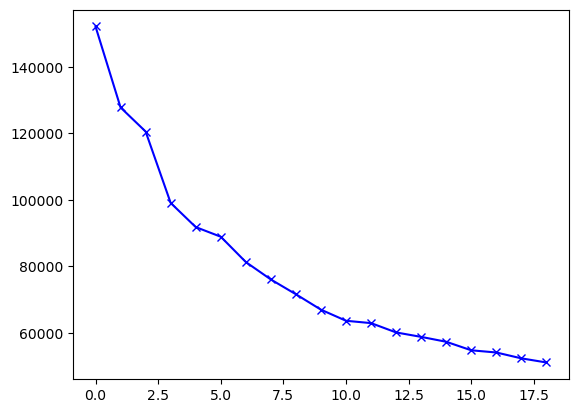

In [7]:
loss = [];
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i);
    kmeans.fit(marketing_df);
    loss.append(kmeans.inertia_);

plt.plot(loss, 'bx-');

In [8]:
kmeans = KMeans(n_clusters=8);
kmeans.fit(marketing_df);
labels = kmeans.labels_;

In [9]:
print(np.unique(labels, return_counts=True));

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([1184,  647,  351, 3523, 2157,   24, 1027,   37], dtype=int64))


In [10]:
cluster_centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=[colunas]);
cluster_centroides = scaler.inverse_transform(cluster_centroides);
cluster_centroides = pd.DataFrame(data=cluster_centroides, columns=[colunas]);
cluster_centroides

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1323.321688,0.969635,2142.853201,1678.837922,464.015279,292.838842,0.878408,0.752555,0.441950,0.053964,1.018581,29.930743,6114.281327,2138.057427,511.551716,0.278776,11.876689
1,829.736797,0.767679,377.825580,238.113509,140.175750,1062.359156,0.393198,0.116331,0.260831,0.190024,3.129830,4.870170,2466.225321,595.914841,384.288521,0.153286,7.293663
2,3699.673720,0.987024,6384.593761,3634.061738,2752.241425,658.509327,0.956885,0.673729,0.867569,0.079509,2.282051,92.521368,9244.444444,5967.375195,1756.549550,0.230246,11.968661
3,1093.985721,0.806198,257.929421,196.886750,61.267389,594.232630,0.158198,0.081383,0.075871,0.113329,2.172296,2.809537,3441.476015,1045.981544,587.876355,0.070974,11.880500
4,713.847673,0.909640,867.320978,164.795155,702.939954,187.830546,0.869097,0.076991,0.823319,0.036181,0.697728,18.253593,3462.142402,1037.256844,612.569342,0.262581,11.856282
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,4788.962765,0.972363,476.058870,297.514323,178.643544,4794.972629,0.279035,0.131072,0.182871,0.499383,15.308666,7.323272,7789.926529,3751.939093,1724.175106,0.036015,11.628043
7,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,0.000000,11.918919


**cluster 7 (clientes de risco)**: clientes que sacam valores altos de credito, mesmo com balanço ao redor de \\$6181, temos saques de crédito de \\$7246, em média. O valor do crédito é frequentemente usado (57%), e possuem uma baixa taxa de pagamento completo das faturas, cerca de 5%. Além disso, os valores de compras parceladas são baixas. Isso indica um risco para o banco, uma vez que o empréstimo resulta em prejuízo.

**cluster 6 (clientes mais novos)**: clientes com aproximadamente 10 anos em média na instituição. Esses clientes possuem um balanço alto, porém o menor valor de compras parceladas, em média, e um valor relativamente alto de uso de crédito, \\$2697. Porém uma taxa pagamento de faturas completas baixa (3%).

**cluster 3 (clientes lucrativos)**: clientes com um balanço relativamente alto (\\$5567), além de serem clientes com alta rotatividade na conta, com altos valores de compras (\\$24957), desses cerca de \\$18186 são feitos a vista e \\$6771 são feitos parceladamente. Por mais que o valor de resgate de crédito seja mediano (\\$1858), o pagamento fechado de faturas é o mais alto com 48%. Isso indica clientes com condições de pagamento de crédito e juros, além de pegar empréstimos mais altos.

**cluster 5 (clientes com situação financeira mais baixa)**: clientes com menor balanço (\\109). Além de uma frequencia de compra baixa, com 36%. Clientes com uma baixa taxa de compras, e baixa taxa de empréstimos (\\$320). Além de não ser bons pagadores de dividas (22%).

In [11]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(marketing_df)
principal_comp

array([[-1.6822203 , -1.07645015],
       [-1.13829821,  2.5064677 ],
       [ 0.96967808, -0.38353565],
       ...,
       [-0.9262032 , -1.81078358],
       [-2.33654765, -0.65795516],
       [-0.55642241, -0.40046942]])

In [12]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138298,2.506468
2,0.969678,-0.383536
3,-0.873626,0.043171
4,-1.599434,-0.688581


In [13]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,3
1,-1.138298,2.506468,6
2,0.969678,-0.383536,0
3,-0.873626,0.043171,3
4,-1.599434,-0.688581,3


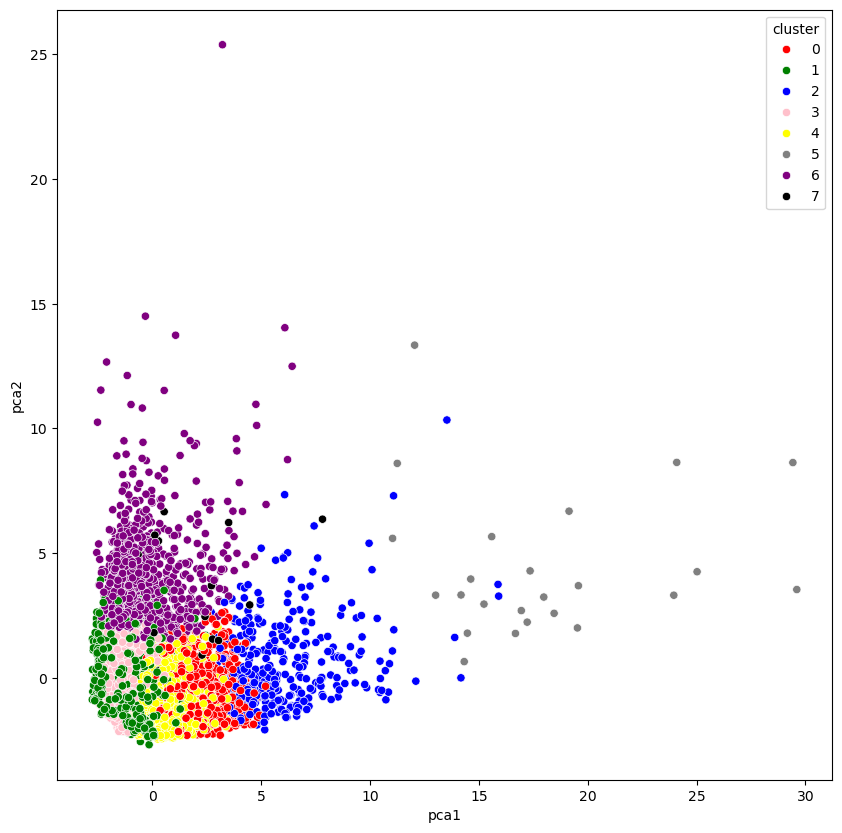

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']);

In [15]:
print(marketing_df.shape);

input_df = Input(shape=(17,));
x = Dense(500, activation='relu')(input_df);
x = Dense(2000, activation='relu')(x);

encoded = Dense(10, activation='relu')(x);

x = Dense(2000, activation='relu')(encoded);
x = Dense(500, activation='relu')(x);

decoded = Dense(17)(x);

autoencoder = Model(input_df, decoded);
encoder = Model(input_df, encoded);

(8950, 17)


In [16]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error');
autoencoder.fit(marketing_df, marketing_df, epochs = 50);

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3367
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0976
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0571
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0712
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0676
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0385
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0673
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0489
Epoch 9/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0331
Epoch 10/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0307
Epoch 11/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0234
Epoch 12/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0424
Epoch 13/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0333
Epoch 14/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0554
Epoch 15/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [17]:
compact = encoder.predict(marketing_df);

loss_compact = [];
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i);
    kmeans.fit(compact);
    loss_compact.append(kmeans.inertia_);

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


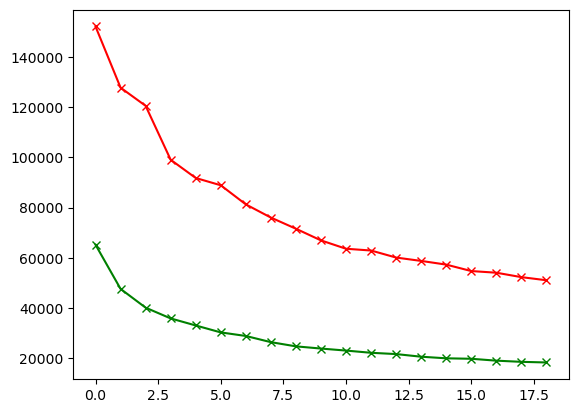

In [18]:
plt.plot(loss, 'bx-', color = 'r')
plt.plot(loss_compact, 'bx-', color = 'g');

In [21]:
kmeans = KMeans(n_clusters=4);
kmeans.fit(compact);
labels = kmeans.labels_

In [22]:
pca = PCA(n_components = 2);
prin_comp = pca.fit_transform(compact);
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2']);
pca_df

,pca1,pca2
0,-1.738216,0.043992
1,0.820584,-1.405496
2,-0.522316,0.450633
3,-1.079990,0.308842
4,-1.738513,0.051070
...,...,...
8945,2.093675,-0.821395
8946,2.466447,-1.040358
8947,1.884707,-1.007594
8948,1.442050,-1.387937


In [23]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1);

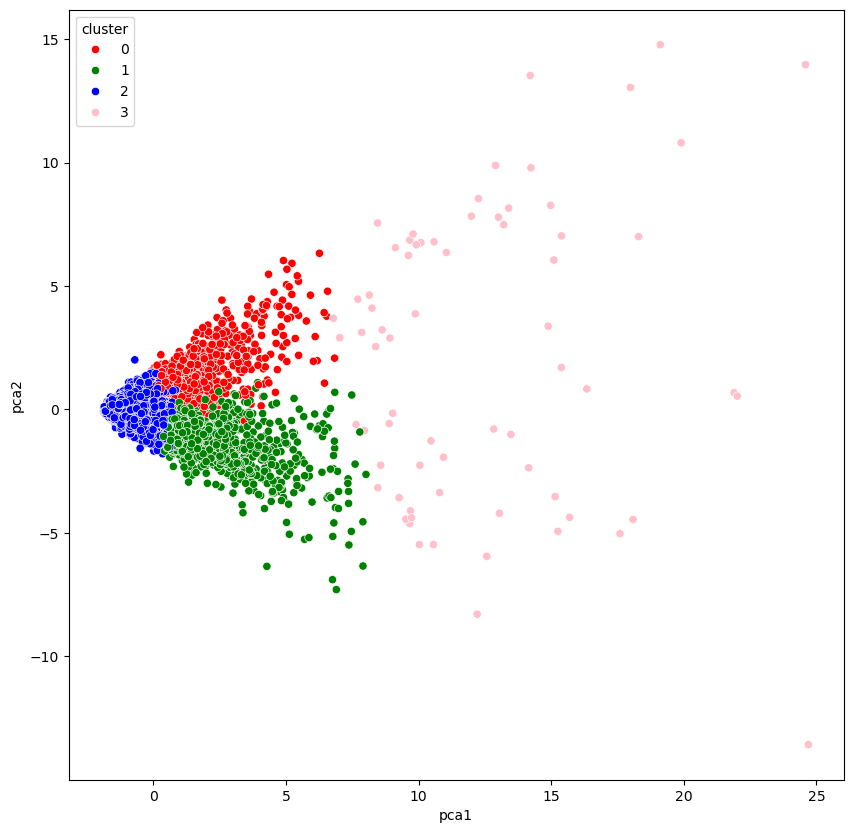

In [24]:
plt.figure(figsize=(10,10));
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink']);